# **CSE422 ML Project: Diabetes Prediction**
* Lab Section: 01
* Group No: 14
* Member 1: Niloy Ahsan (21101255)
* Member 2: Chaity Rani Ghosh (21101191)



---



## Importing the Libraries

In [60]:
# Importing required dependencies
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## Diabetes Dataset
#### *Diabetes Dataset Download Link: [Download](https://github.com/niloyahsan1/CSE422-ML-Project/blob/main/diabetes_prediction_dataset.csv)*

In [61]:
# from google.colab import files
# files.upload()

In [62]:
# # Reading the dataset
# diabetes_dataset = pd.read_csv('diabetes_prediction_dataset.csv')

In [63]:
# # Mounting Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [64]:
# # Reading the dataset
# diabetes_dataset = pd.read_csv('/content/drive/My Drive/CSE422 Project/diabetes_prediction_dataset.csv')

In [65]:
# # Reading the dataset from GitHub Repo
dataset_URL = 'https://raw.githubusercontent.com/niloyahsan1/CSE422-ML-Project/master/diabetes_prediction_dataset.csv'

diabetes_dataset = pd.read_csv(dataset_URL)



---



## Data Visualization and Preprocessing

In [66]:
# Printing the first 10 rows of the dataset
diabetes_dataset.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,NaN,0
1,Female,54.0,0,0,No Info,27.32,6.6,80.0,0
2,Male,28.0,0,0,never,27.32,5.7,158.0,0
3,Female,36.0,0,0,current,23.45,5.0,155.0,0
4,Male,76.0,1,1,current,20.14,4.8,155.0,0
5,Female,20.0,0,0,never,27.32,6.6,85.0,0
6,Female,44.0,0,0,never,19.31,6.5,200.0,1
7,Female,79.0,0,0,No Info,23.86,5.7,85.0,0
8,Male,42.0,0,0,never,33.64,4.8,145.0,0
9,Female,32.0,0,0,never,27.32,5.0,100.0,0


In [67]:
# Counting the number of rows and columns
print('Number of Rows and Columns:')

diabetes_dataset.shape

Number of Rows and Columns:


(100000, 9)

In [68]:
# Checking informations of the dataset
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  92268 non-null   float64
 8   diabetes             100000 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 6.9+ MB


In [69]:
# Checking description of the dataset
diabetes_dataset.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92268.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,137.895327,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,42.375461,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,145.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [70]:
# Checking for the non-numeric columns
cols = list(diabetes_dataset.columns)
to_one_hot = []

for i in cols:
    if type(diabetes_dataset[i].iloc[0]) == str:
        to_one_hot.append(i)

print('Colums with Catagorical values --->', to_one_hot)

Colums with Catagorical values ---> ['gender', 'smoking_history']


In [71]:
# Checking the unique values of this a particular column
diabetes_dataset['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [72]:
# Checking the unique values of this a particular column
diabetes_dataset['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [73]:
# Converting non-numeric columns to numeric using one-hot encoding

to_one_hot = diabetes_dataset.select_dtypes(include = ['object']).columns

diabetes_dataset = pd.get_dummies(diabetes_dataset, columns = to_one_hot, dtype=int)

In [74]:
# Again checking for the non-numeric columns
cols = list(diabetes_dataset.columns)
to_one_hot = []

for i in cols:
    if type(diabetes_dataset[i].iloc[0]) == str:
        to_one_hot.append(i)

print('Colums with Catagorical values --->', to_one_hot)

Colums with Catagorical values ---> []


In [75]:
# Printing the first 10 rows to check one-hot
diabetes_dataset.head(10)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,NaN,0,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80.0,0,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158.0,0,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155.0,0,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155.0,0,0,1,0,0,1,0,0,0,0
5,20.0,0,0,27.32,6.6,85.0,0,1,0,0,0,0,0,0,1,0
6,44.0,0,0,19.31,6.5,200.0,1,1,0,0,0,0,0,0,1,0
7,79.0,0,0,23.86,5.7,85.0,0,1,0,0,1,0,0,0,0,0
8,42.0,0,0,33.64,4.8,145.0,0,0,1,0,0,0,0,0,1,0
9,32.0,0,0,27.32,5.0,100.0,0,1,0,0,0,0,0,0,1,0


In [76]:
# Counting the number of rows and columns
print('Number of Rows and Columns:')

diabetes_dataset.shape

Number of Rows and Columns:


(100000, 16)

In [77]:
# Checking null values if any
diabetes_dataset.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
bmi                               0
HbA1c_level                       0
blood_glucose_level            7732
diabetes                          0
gender_Female                     0
gender_Male                       0
gender_Other                      0
smoking_history_No Info           0
smoking_history_current           0
smoking_history_ever              0
smoking_history_former            0
smoking_history_never             0
smoking_history_not current       0
dtype: int64

In [78]:
# Calculating the Median
median = diabetes_dataset['blood_glucose_level'].median()

print('The median is =', median)

The median is = 145.0


In [79]:
# Imputing mean values in the NULL columns
new_value = SimpleImputer(strategy='median')

diabetes_dataset['blood_glucose_level'] = new_value.fit_transform(diabetes_dataset[['blood_glucose_level']])

In [80]:
# Again checking null values if any
diabetes_dataset.isnull().sum()

age                            0
hypertension                   0
heart_disease                  0
bmi                            0
HbA1c_level                    0
blood_glucose_level            0
diabetes                       0
gender_Female                  0
gender_Male                    0
gender_Other                   0
smoking_history_No Info        0
smoking_history_current        0
smoking_history_ever           0
smoking_history_former         0
smoking_history_never          0
smoking_history_not current    0
dtype: int64

In [81]:
# Counting the values of the diabetes column
diabetes_dataset['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

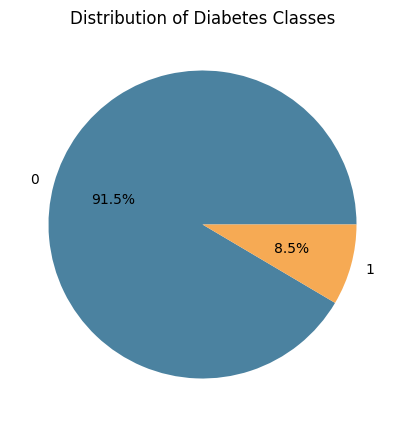

In [82]:
# Representing N classes using a Bar Chart
category_counts = diabetes_dataset['diabetes'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['#4b82a0', '#f6aa54'])
plt.title('Distribution of Diabetes Classes')

plt.show()

In [83]:
# Calculating the correlation matrix
diabetes_corr = diabetes_dataset.corr()

diabetes_corr

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110584,0.258008,0.030480,-0.030282,-0.007348,-0.276945,0.030946,0.065768,0.216481,0.065498,0.067663
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084351,0.197823,-0.014318,0.014423,-0.003816,-0.117210,0.017930,0.023124,0.083401,0.045953,0.000997
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.069998,0.171727,-0.077832,0.077911,-0.002718,-0.052398,0.007604,0.040671,0.095194,-0.030843,0.007922
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091184,0.214357,0.023016,-0.023021,0.000119,-0.222553,0.053617,0.044343,0.111312,0.086849,0.034979
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166494,0.400660,-0.020015,0.020058,-0.001528,-0.045979,0.006123,0.009655,0.037306,0.010684,0.009830
blood_glucose_level,0.110584,0.084351,0.069998,0.091184,0.166494,1.000000,0.419001,-0.017134,0.017121,0.000512,-0.051746,0.012553,0.006238,0.040605,0.012651,0.008482
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419001,1.000000,-0.037553,0.037666,-0.004090,-0.118939,0.019606,0.024080,0.097917,0.027267,0.020734
gender_Female,0.030480,-0.014318,-0.077832,0.023016,-0.020015,-0.017134,-0.037553,1.000000,-0.999629,-0.015948,-0.053810,-0.026517,-0.011019,-0.048927,0.098682,0.011419
gender_Male,-0.030282,0.014423,0.077911,-0.023021,0.020058,0.017121,0.037666,-0.999629,1.000000,-0.011285,0.053833,0.026636,0.010991,0.049048,-0.098547,-0.011985
gender_Other,-0.007348,-0.003816,-0.002718,0.000119,-0.001528,0.000512,-0.004090,-0.015948,-0.011285,1.000000,-0.000695,-0.004293,0.001062,-0.004310,-0.005181,0.020760


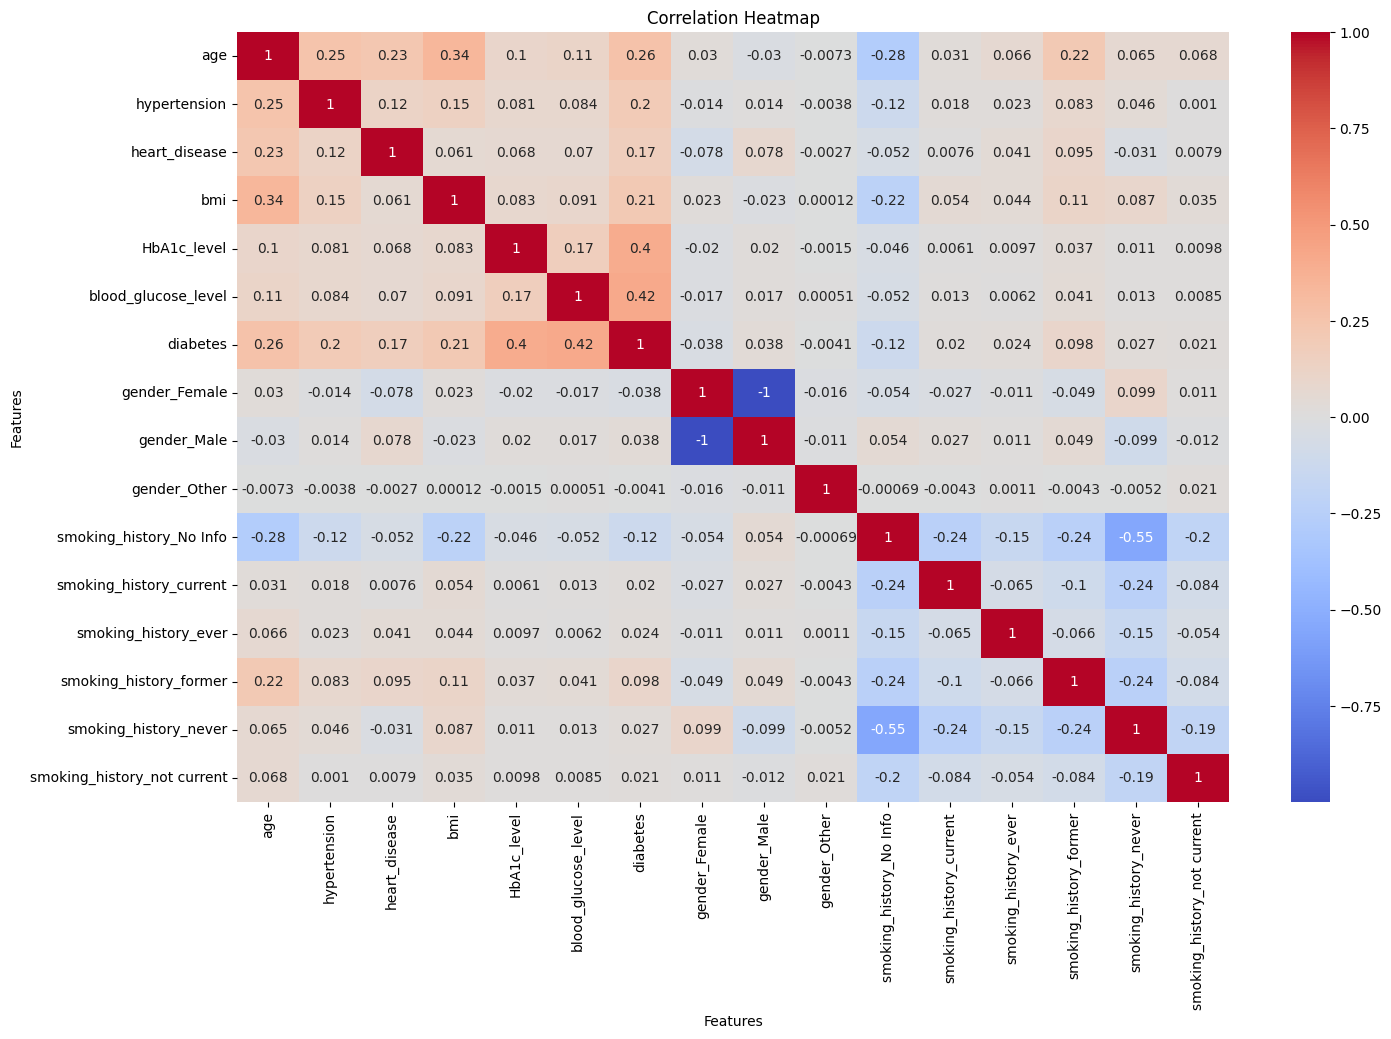

In [84]:
# Generating a heatmap for visualization of the correlation matrix
plt.figure(figsize=(16, 10))

# sns.heatmap(diabetes_corr, cmap = 'RdBu', annot = True)
sns.heatmap(diabetes_corr, cmap = 'coolwarm', annot = True)   # "annot = True" is for showing the numbers

# Other details for the map
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(rotation=90)

plt.show()

In [85]:
# Showing total number of columns
diabetes_dataset.shape[1]

16

In [86]:
# Showing the columns
diabetes_dataset.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_Female', 'gender_Male',
       'gender_Other', 'smoking_history_No Info', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current'],
      dtype='object')

### ***Decided to drop the below columns:***
* 'smoking_history_not current'
* 'smoking_history_current'
* 'smoking_history_ever'
* 'gender_Other'



In [87]:
# Dropping the unnesassary columns
diabetes_dataset = diabetes_dataset.drop(['smoking_history_not current', 'smoking_history_current', 'smoking_history_ever', 'gender_Other'], axis = 1)

In [88]:
# Showing total number of columns
diabetes_dataset.shape[1]

12

In [89]:
# Showing the columns
diabetes_dataset.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_Female', 'gender_Male',
       'smoking_history_No Info', 'smoking_history_former',
       'smoking_history_never'],
      dtype='object')

In [90]:
# Shape of the dataset
diabetes_dataset.shape

(100000, 12)

In [91]:
# Separating the Data and Labels
D = diabetes_dataset.drop(columns = 'diabetes', axis = 1)  # Saving the features
L = diabetes_dataset['diabetes']   # Saving the labels

In [92]:
print('Features:\n', D)
print('-----------------------------------------------------------')
print('Label:\n', L)

Features:
         age  hypertension  heart_disease    bmi  HbA1c_level  \
0      80.0             0              1  25.19          6.6   
1      54.0             0              0  27.32          6.6   
2      28.0             0              0  27.32          5.7   
3      36.0             0              0  23.45          5.0   
4      76.0             1              1  20.14          4.8   
...     ...           ...            ...    ...          ...   
99995  80.0             0              0  27.32          6.2   
99996   2.0             0              0  17.37          6.5   
99997  66.0             0              0  27.83          5.7   
99998  24.0             0              0  35.42          4.0   
99999  57.0             0              0  22.43          6.6   

       blood_glucose_level  gender_Female  gender_Male  \
0                    145.0              1            0   
1                     80.0              1            0   
2                    158.0              0     



---



## **Accuracy Checking Before Feature Scaling**

### Splitting the Train and the Test into **20:80** Ratio

In [93]:
D_train, D_test, L_train, L_test = train_test_split(D, L, test_size = 0.2, stratify = L, random_state = 1)

In [94]:
print('Original Data Size --->', D.shape)
print('Training Data Shape -->', D_train.shape)
print('Test Data Shape ------>', D_test.shape)

Original Data Size ---> (100000, 11)
Training Data Shape --> (80000, 11)
Test Data Shape ------> (20000, 11)


In [95]:
# Counting the values of the diabetes column
diabetes_dataset['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [96]:
# Checking Diabetes frequency in training values
L_train.value_counts()

diabetes
0    73200
1     6800
Name: count, dtype: int64

In [97]:
# Checking Diabetes frequency in test values
L_test.value_counts()

diabetes
0    18300
1     1700
Name: count, dtype: int64

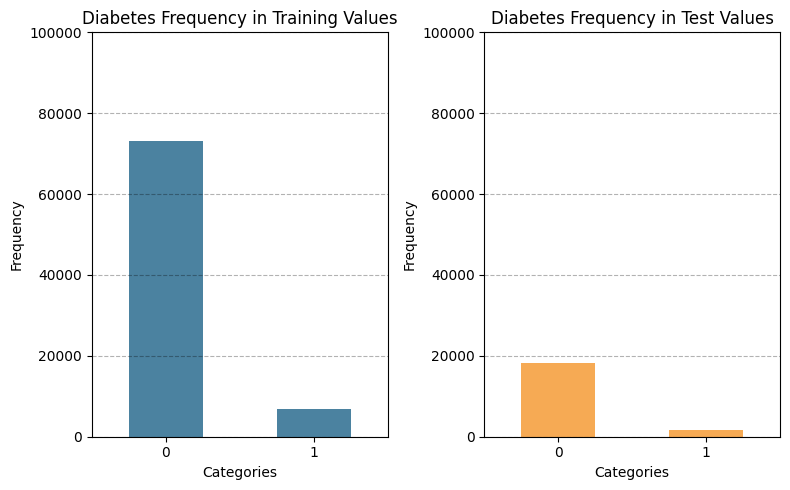

In [98]:
train_frequency_count = L_train.value_counts()
test_frequency_count = L_test.value_counts()

fig = plt.figure(figsize=(8, 5))

# Defining Sub Plots
axes = fig.subplots(nrows=1, ncols=2)

# Representing Diabetes frequency in training values
train_frequency_count.plot(kind='bar', color='#4b82a0', ax=axes[0])
axes[0].set_title('Diabetes Frequency in Training Values')
axes[0].set_xlabel('Categories')
axes[0].set_ylabel('Frequency')
axes[0].set_ylim(0, 100000)
axes[0].set_xticklabels(train_frequency_count.index, rotation=0)
axes[0].grid(axis='y', linestyle='--', alpha=0.3, color='black')

# Representing Diabetes frequency in test values
test_frequency_count.plot(kind='bar', color='#f6aa54', ax=axes[1])
axes[1].set_title('Diabetes Frequency in Test Values')
axes[1].set_xlabel('Categories')
axes[1].set_ylabel('Frequency')
axes[1].set_ylim(0, 100000)
axes[1].set_xticklabels(test_frequency_count.index, rotation=0)
axes[1].grid(axis='y', linestyle='--', alpha=0.3, color='black')


plt.tight_layout()
plt.show()

### Training the Model

- ***k-Nearest Neighbors (KNN) Model***

---

In [99]:
# Defining the neighbors for KNN Model
k = 13

knn_model = KNeighborsClassifier(n_neighbors = k)
knn_model.fit(D_train, L_train)
D_test_prediction_KNN = knn_model.predict(D_test)

In [100]:
# Checking accuracy
accuracy_KNN = accuracy_score(D_test_prediction_KNN, L_test)
print('Test Data Accuracy(KNN) ---->', accuracy_KNN*100, '%')

Test Data Accuracy(KNN) ----> 95.44500000000001 %


In [101]:
# Generating classification report
report_KNN = classification_report(D_test_prediction_KNN, L_test)
print("Classification Report:\n", report_KNN)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98     19111
           1       0.49      0.94      0.65       889

    accuracy                           0.95     20000
   macro avg       0.75      0.95      0.81     20000
weighted avg       0.97      0.95      0.96     20000



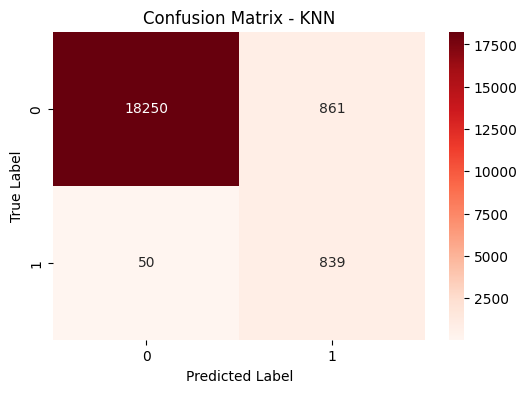

In [102]:
# Generating confusion matrix
matrix_KNN = confusion_matrix(D_test_prediction_KNN, L_test)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix_KNN, annot=True, cmap='Reds', fmt='g')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

- ***Support Vector Machine (SVM) Model***

---

In [103]:
# Defining the Kernel type for SVM Model
kernel_type = 'linear'

svm_model = svm.SVC(kernel = kernel_type)
svm_model.fit(D_train, L_train)
D_test_prediction_liner = svm_model.predict(D_test)

# Checking accuracy
accuracy_Liner = accuracy_score(D_test_prediction_liner, L_test)
print('SVM Liner Accuracy ---->', accuracy_Liner*100, '%')

SVM Liner Accuracy ----> 95.91499999999999 %


In [104]:
# Defining the Kernel type for SVM Model
kernel_type = 'rbf'

svm_model = svm.SVC(kernel = kernel_type)
svm_model.fit(D_train, L_train)
D_test_prediction_RBF = svm_model.predict(D_test)

# Checking accuracy
accuracy_RBF = accuracy_score(D_test_prediction_RBF, L_test)
print('SVM RBF Accuracy ---->', accuracy_RBF*100, '%')

SVM RBF Accuracy ----> 94.80499999999999 %


In [105]:
# Defining the Kernel type for SVM Model
kernel_type = 'poly'

svm_model = svm.SVC(kernel = kernel_type)
svm_model.fit(D_train, L_train)
D_test_prediction_Poly = svm_model.predict(D_test)

# Checking accuracy
accuracy_Poly = accuracy_score(D_test_prediction_Poly, L_test)
print('SVM Poly Accuracy ---->', accuracy_Poly*100, '%')

SVM Poly Accuracy ----> 95.255 %


In [106]:
# Defining the Kernel type for SVM Model
kernel_type = 'sigmoid'

svm_model = svm.SVC(kernel = kernel_type)
svm_model.fit(D_train, L_train)
D_test_prediction_Sigmoid = svm_model.predict(D_test)

# Checking accuracy
accuracy_Sigmoid = accuracy_score(D_test_prediction_Sigmoid, L_test)
print('SVM Sigmoid Accuracy ---->', accuracy_Sigmoid*100, '%')

SVM Sigmoid Accuracy ----> 83.955 %


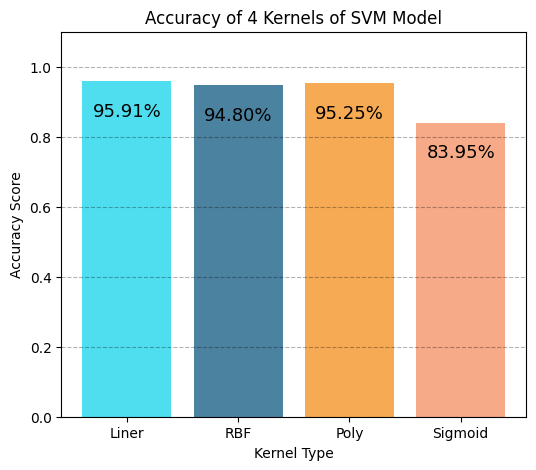

In [107]:
# Showcasing prediction accuracy of the 4 Kernels of SVM using Bar Chart
used_models = ['Liner', 'RBF', 'Poly', 'Sigmoid']
accuracies = [accuracy_Liner, accuracy_RBF, accuracy_Poly, accuracy_Sigmoid]
colors = ['#4fdef0', '#4b82a0', '#f6aa54', '#f6aa87']

plt.figure(figsize=(6, 5))
bars = plt.bar(used_models, accuracies, color=colors)

# Adding percentages on top of bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()-0.1, f'{accuracy:.2%}', ha='center', color='black', fontsize=13)

plt.title('Accuracy of 4 Kernels of SVM Model')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.3, color='black')

plt.show()

### ----> *Choosing the **Linear** Kernel Type after seeing the Graph*

In [108]:
# # Defining the Kernel type for SVM Model
kernel_type = 'linear'

svm_model = svm.SVC(kernel = kernel_type)
svm_model.fit(D_train, L_train)
D_test_prediction_SVM = svm_model.predict(D_test)

In [109]:
# Checking accuracy
accuracy_SVM = accuracy_score(D_test_prediction_SVM, L_test)
print('SVM Liner Accuracy ---->', accuracy_SVM*100, '%')

SVM Liner Accuracy ----> 95.91499999999999 %


In [110]:
# Generating classification report
report_SVM = classification_report(D_test_prediction_SVM, L_test)
print("Classification Report:\n", report_SVM)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98     18877
           1       0.59      0.89      0.71      1123

    accuracy                           0.96     20000
   macro avg       0.79      0.93      0.84     20000
weighted avg       0.97      0.96      0.96     20000



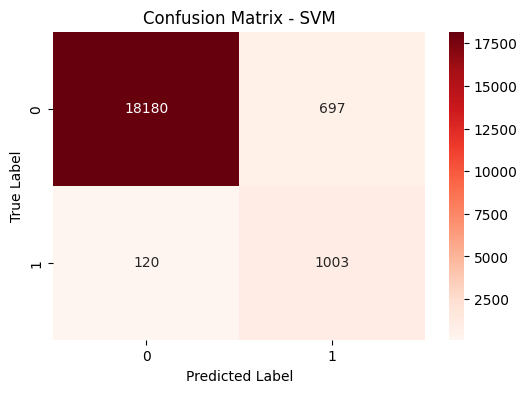

In [111]:
# Generating confusion matrix
matrix_SVM = confusion_matrix(D_test_prediction_SVM, L_test)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix_SVM, annot=True, cmap='Reds', fmt='g')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

- ***Decision Tree Model***

---

In [112]:
# Defining the max_depth, min_samples_split, min_samples_leaf for Decision Tree Model
depth = 5
split = 5
leaf = 2

decision_tree_model = DecisionTreeClassifier(max_depth = depth,
                                             min_samples_split = split,
                                             min_samples_leaf = leaf)
decision_tree_model.fit(D_train, L_train)
D_test_prediction_DT = decision_tree_model.predict(D_test)

In [113]:
# Checking accuracy
accuracy_DT = accuracy_score(D_test_prediction_DT, L_test)
print('Test Data Accuracy(DT) ---->', accuracy_DT*100, '%')

Test Data Accuracy(DT) ----> 97.22 %


In [114]:
# Generating classification report
report_DT = classification_report(D_test_prediction_DT, L_test)
print("Classification Report:\n", report_DT)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     18856
           1       0.67      1.00      0.80      1144

    accuracy                           0.97     20000
   macro avg       0.84      0.99      0.89     20000
weighted avg       0.98      0.97      0.97     20000



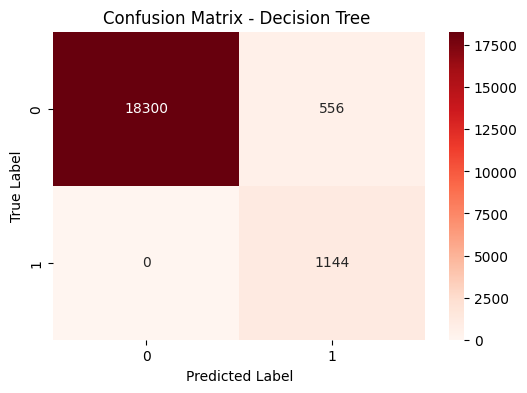

In [155]:
# Generating confusion matrix
matrix_DT = confusion_matrix(D_test_prediction_DT, L_test)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix_DT, annot=True, cmap='Reds', fmt='g')
plt.title('Confusion Matrix - Decision Tree ')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

- ***Random Forest Model***
---



In [116]:
# Defining the n_estimators, max_depth, min_samples_split, min_samples_leaf for Random Forest Model
n = 100
depth = 10
split = 5
leaf = 2

random_forest_model = RandomForestClassifier(n_estimators = n,
                                             max_depth = depth,
                                             min_samples_split = split,
                                             min_samples_leaf = leaf)
random_forest_model.fit(D_train, L_train)
D_test_prediction_RF = random_forest_model.predict(D_test)

In [117]:
# Checking accuracy
accuracy_RF = accuracy_score(D_test_prediction_RF, L_test)
print('Test Data Accuracy(RF) ---->', accuracy_RF*100, '%')

Test Data Accuracy(RF) ----> 97.22 %


In [118]:
# Generating classification report
report_RF = classification_report(D_test_prediction_RF, L_test)
print("Classification Report:\n", report_RF)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     18856
           1       0.67      1.00      0.80      1144

    accuracy                           0.97     20000
   macro avg       0.84      0.99      0.89     20000
weighted avg       0.98      0.97      0.97     20000



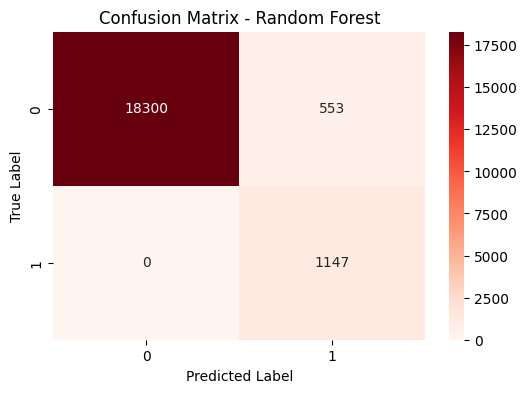

In [156]:
# Generating confusion matrix
matrix_RF = confusion_matrix(D_test_prediction_RF, L_test)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix_RF, annot=True, cmap='Reds', fmt='g')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

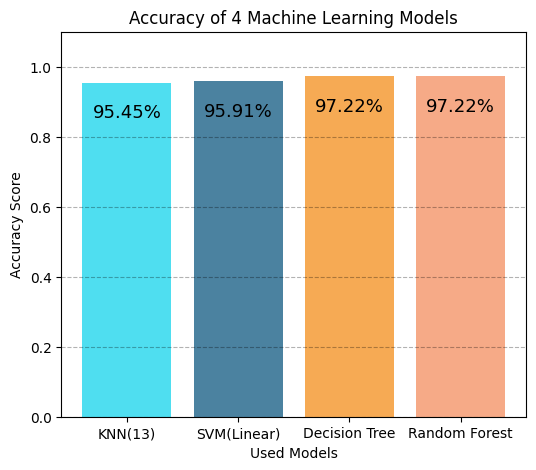

In [120]:
# Showcasing prediction accuracy of the 4 Models using Bar Chart
used_models = ['KNN(13)', 'SVM(Linear)', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_KNN, accuracy_SVM, accuracy_DT, accuracy_RF]
colors = ['#4fdef0', '#4b82a0', '#f6aa54', '#f6aa87']

plt.figure(figsize=(6, 5))
bars = plt.bar(used_models, accuracies, color=colors)

# Adding percentages on top of bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.1, f'{accuracy:.2%}', ha='center', color='black', fontsize=13)

plt.title('Accuracy of 4 Machine Learning Models')
plt.xlabel('Used Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.3, color='black')

plt.show()



---



## Feature Scaling

In [121]:
scaler = StandardScaler()

In [122]:
D_scaled = scaler.fit_transform(D)

In [123]:
print('D_scaled\n', D_scaled)

D_scaled
 [[ 1.69270354 -0.28443945  4.93637859 ... -0.74700782 -0.32119822
   1.35992968]
 [ 0.53800643 -0.28443945 -0.20257766 ...  1.33867406 -0.32119822
  -0.73533214]
 [-0.61669069 -0.28443945 -0.20257766 ... -0.74700782 -0.32119822
   1.35992968]
 ...
 [ 1.07094356 -0.28443945 -0.20257766 ... -0.74700782  3.11334224
  -0.73533214]
 [-0.7943364  -0.28443945 -0.20257766 ... -0.74700782 -0.32119822
   1.35992968]
 [ 0.67124071 -0.28443945 -0.20257766 ... -0.74700782 -0.32119822
  -0.73533214]]


In [124]:
D = D_scaled
L = diabetes_dataset['diabetes']

In [125]:
print('Features\n', D)
print('-----------------------------------------------------------')
print('Label\n', L)

Features
 [[ 1.69270354 -0.28443945  4.93637859 ... -0.74700782 -0.32119822
   1.35992968]
 [ 0.53800643 -0.28443945 -0.20257766 ...  1.33867406 -0.32119822
  -0.73533214]
 [-0.61669069 -0.28443945 -0.20257766 ... -0.74700782 -0.32119822
   1.35992968]
 ...
 [ 1.07094356 -0.28443945 -0.20257766 ... -0.74700782  3.11334224
  -0.73533214]
 [-0.7943364  -0.28443945 -0.20257766 ... -0.74700782 -0.32119822
   1.35992968]
 [ 0.67124071 -0.28443945 -0.20257766 ... -0.74700782 -0.32119822
  -0.73533214]]
-----------------------------------------------------------
Label
 0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64




---



## **Accuracy Checking After Feature Scaling**

### Splitting the Train and the Test into **20:80** Ratio

In [126]:
D_train, D_test, L_train, L_test = train_test_split(D, L, test_size = 0.2, stratify = L, random_state = 1)

In [127]:
print('Original Data Size --->', D.shape)
print('Train Data Shape ----->', D_train.shape)
print('Test Data Shape ------>', D_test.shape)

Original Data Size ---> (100000, 11)
Train Data Shape -----> (80000, 11)
Test Data Shape ------> (20000, 11)


In [128]:
# Checking the frequency of training values
L_test.value_counts()

diabetes
0    18300
1     1700
Name: count, dtype: int64

In [129]:
# Checking the frequency of test values
L_train.value_counts()

diabetes
0    73200
1     6800
Name: count, dtype: int64

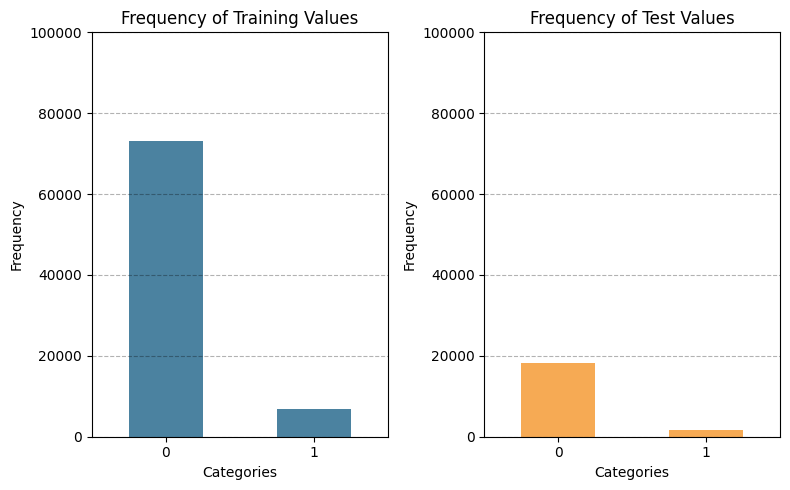

In [130]:
train_frequency_count = L_train.value_counts()
test_frequency_count = L_test.value_counts()

fig = plt.figure(figsize=(8, 5))

# Defining Sub Plots
axes = fig.subplots(nrows=1, ncols=2)

# Representing the frequency of training values
train_frequency_count.plot(kind='bar', color='#4b82a0', ax=axes[0])
axes[0].set_title('Frequency of Training Values')
axes[0].set_xlabel('Categories')
axes[0].set_ylabel('Frequency')
axes[0].set_ylim(0, 100000)
axes[0].set_xticklabels(train_frequency_count.index, rotation=0)
axes[0].grid(axis='y', linestyle='--', alpha=0.3, color='black')

# Representing the frequency of test values
test_frequency_count.plot(kind='bar', color='#f6aa54', ax=axes[1])
axes[1].set_title('Frequency of Test Values')
axes[1].set_xlabel('Categories')
axes[1].set_ylabel('Frequency')
axes[1].set_ylim(0, 100000)
axes[1].set_xticklabels(test_frequency_count.index, rotation=0)
axes[1].grid(axis='y', linestyle='--', alpha=0.3, color='black')

plt.tight_layout()
plt.show()

### Training the Model

- ***k-Nearest Neighbors (KNN) Model***

In [131]:
# Defining the neighbors for KNN Model
k = 13

knn_model = KNeighborsClassifier(n_neighbors = k)
knn_model.fit(D_train, L_train)
D_test_prediction_KNN = knn_model.predict(D_test)

In [132]:
# Checking accuracy
accuracy_KNN = accuracy_score(D_test_prediction_KNN, L_test)
print('Test Data Accuracy(KNN) ---->', accuracy_KNN*100, '%')

Test Data Accuracy(KNN) ----> 96.155 %


In [133]:
# Generating classification report
report_KNN = classification_report(D_test_prediction_KNN, L_test)
print("Classification Report:\n", report_KNN)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     18975
           1       0.58      0.95      0.72      1025

    accuracy                           0.96     20000
   macro avg       0.79      0.96      0.85     20000
weighted avg       0.98      0.96      0.97     20000



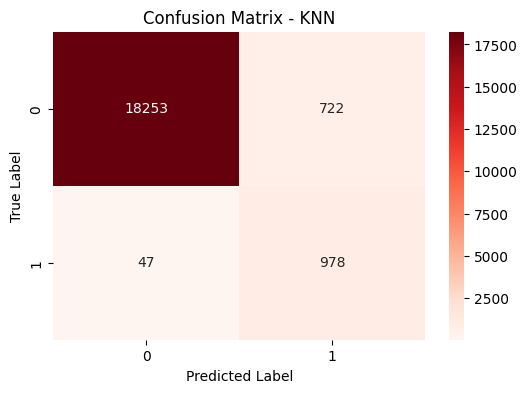

In [157]:
# Generating confusion matrix
matrix_KNN = confusion_matrix(D_test_prediction_KNN, L_test)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix_KNN, annot=True, cmap='Reds', fmt='g')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

- ***Support Vector Machine (SVM) Model***

In [135]:
# Defining the Kernel type for SVM Model
kernel_type = 'linear'

svm_model = svm.SVC(kernel = kernel_type)
svm_model.fit(D_train, L_train)
D_test_prediction_liner = svm_model.predict(D_test)

# Checking accuracy
accuracy_liner = accuracy_score(D_test_prediction_liner, L_test)
print('SVM Liner Accuracy ---->', accuracy_liner*100, '%')

SVM Liner Accuracy ----> 96.015 %


In [136]:
# Defining the Kernel type for SVM Model
kernel_type = 'rbf'

svm_model = svm.SVC(kernel = kernel_type)
svm_model.fit(D_train, L_train)
D_test_prediction_RBF = svm_model.predict(D_test)

# Checking accuracy
accuracy_RBF = accuracy_score(D_test_prediction_RBF, L_test)
print('SVM RBF Accuracy ---->', accuracy_RBF*100, '%')

SVM RBF Accuracy ----> 96.25 %


In [137]:
# Defining the Kernel type for SVM Model
kernel_type = 'poly'

svm_model = svm.SVC(kernel = kernel_type)
svm_model.fit(D_train, L_train)
D_test_prediction_Poly = svm_model.predict(D_test)

# Checking accuracy
accuracy_Poly = accuracy_score(D_test_prediction_Poly, L_test)
print('SVM Poly Accuracy ---->', accuracy_Poly*100, '%')

SVM Poly Accuracy ----> 96.345 %


In [138]:
# Defining the Kernel type for SVM Model
kernel_type = 'sigmoid'

svm_model = svm.SVC(kernel = kernel_type)
svm_model.fit(D_train, L_train)
D_test_prediction_Sigmoid = svm_model.predict(D_test)

# Checking accuracy
accuracy_Sigmoid = accuracy_score(D_test_prediction_Sigmoid, L_test)
print('SVM Sigmoid Accuracy ---->', accuracy_Sigmoid*100, '%')

SVM Sigmoid Accuracy ----> 91.605 %


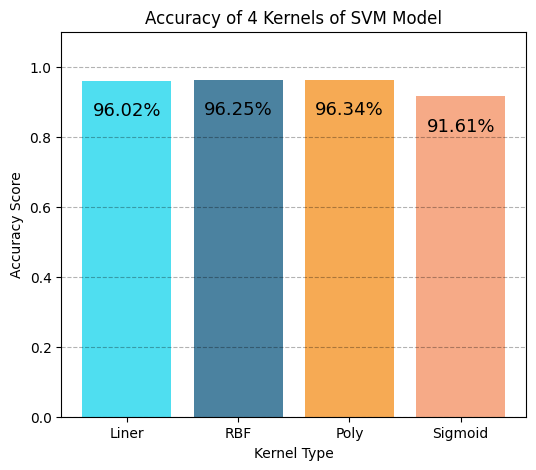

In [139]:
# Showcasing prediction accuracy of the 4 Kernels of SVM using Bar Chart
used_models = ['Liner', 'RBF', 'Poly', 'Sigmoid']
accuracies = [accuracy_liner, accuracy_RBF, accuracy_Poly, accuracy_Sigmoid]
colors = ['#4fdef0', '#4b82a0', '#f6aa54', '#f6aa87']

plt.figure(figsize=(6, 5))
bars = plt.bar(used_models, accuracies, color=colors)

# Adding percentages on top of bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()-0.1, f'{accuracy:.2%}', ha='center', color='black', fontsize=13)

plt.title('Accuracy of 4 Kernels of SVM Model')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.3, color='black')

plt.show()

### ----> *Choosing the **Polynomial** Kernel Type after seeing the Graph*

In [140]:
# # Defining the Kernel type for SVM Model
kernel_type = 'poly'

svm_model = svm.SVC(kernel = kernel_type)
svm_model.fit(D_train, L_train)
D_test_prediction_SVM = svm_model.predict(D_test)

In [141]:
# Checking accuracy
accuracy_SVM = accuracy_score(D_test_prediction_SVM, L_test)
print('SVM Liner Accuracy ---->', accuracy_SVM*100, '%')

SVM Liner Accuracy ----> 96.345 %


In [142]:
# Generating classification report
report_SVM = classification_report(D_test_prediction_SVM, L_test)
print("Classification Report:\n", report_SVM)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     19003
           1       0.58      0.99      0.73       997

    accuracy                           0.96     20000
   macro avg       0.79      0.97      0.85     20000
weighted avg       0.98      0.96      0.97     20000



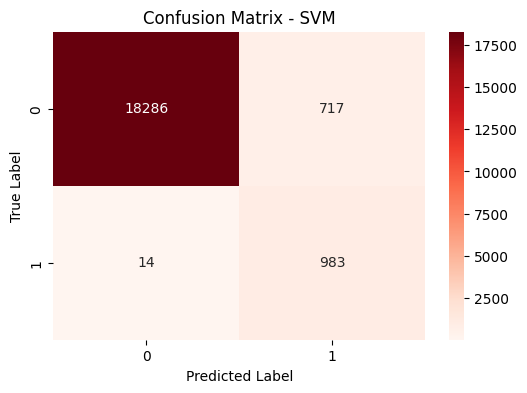

In [158]:
# Generating confusion matrix
matrix_SVM = confusion_matrix(D_test_prediction_SVM, L_test)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix_SVM, annot=True, cmap='Reds', fmt='g')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

- ***Decision Tree Model***

In [144]:
# Defining the max_depth, min_samples_split, min_samples_leaf for Decision Tree Model
depth = 5
split = 5
leaf = 2

decision_tree_model = DecisionTreeClassifier(max_depth = depth,
                                             min_samples_split = split,
                                             min_samples_leaf = leaf)
decision_tree_model.fit(D_train, L_train)
D_test_prediction_DT = decision_tree_model.predict(D_test)

In [145]:
# Checking accuracy
accuracy_DT = accuracy_score(D_test_prediction_DT, L_test)
print('Test Data Accuracy(DT) ---->', accuracy_DT*100, '%')

Test Data Accuracy(DT) ----> 97.22 %


In [146]:
# Generating classification report
report_DT = classification_report(D_test_prediction_DT, L_test)
print("Classification Report:\n", report_DT)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     18856
           1       0.67      1.00      0.80      1144

    accuracy                           0.97     20000
   macro avg       0.84      0.99      0.89     20000
weighted avg       0.98      0.97      0.97     20000



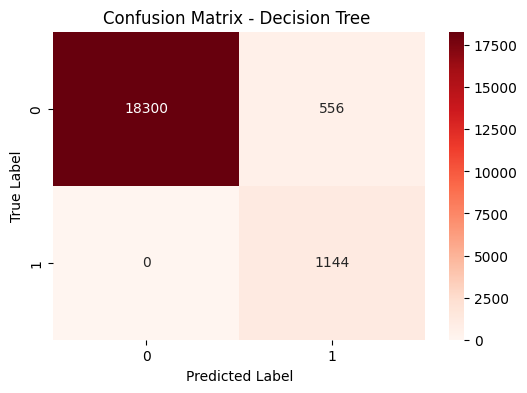

In [159]:
# Generating confusion matrix
matrix_DT = confusion_matrix(D_test_prediction_DT, L_test)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix_DT, annot=True, cmap='Reds', fmt='g')
plt.title('Confusion Matrix - Decision Tree ')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

- ***Random Forest Model***

In [148]:
# Defining the n_estimators, max_depth, min_samples_split, min_samples_leaf for Random Forest Model
n = 100
depth = 10
split = 5
leaf = 2

random_forest_model = RandomForestClassifier(n_estimators = n,
                                             max_depth = depth,
                                             min_samples_split = split,
                                             min_samples_leaf = leaf)
random_forest_model.fit(D_train, L_train)
D_test_prediction_RF = random_forest_model.predict(D_test)

In [149]:
# Checking accuracy
accuracy_RF = accuracy_score(D_test_prediction_RF, L_test)
print('Test Data Accuracy(RF) ---->', accuracy_RF*100, '%')

Test Data Accuracy(RF) ----> 97.235 %


In [150]:
# Generating classification report
report_RF = classification_report(D_test_prediction_RF, L_test)
print("Classification Report:\n", report_RF)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     18853
           1       0.67      1.00      0.81      1147

    accuracy                           0.97     20000
   macro avg       0.84      0.99      0.90     20000
weighted avg       0.98      0.97      0.97     20000



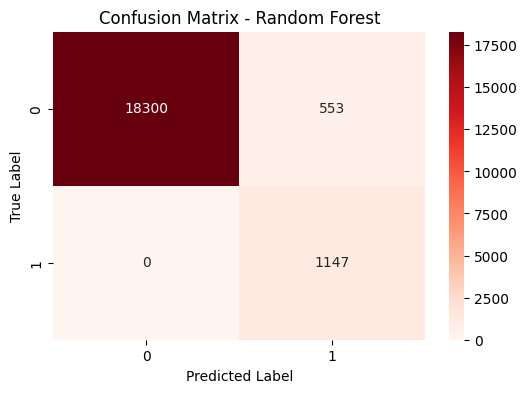

In [160]:
# Generating confusion matrix
matrix_RF = confusion_matrix(D_test_prediction_RF, L_test)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix_RF, annot=True, cmap='Reds', fmt='g')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

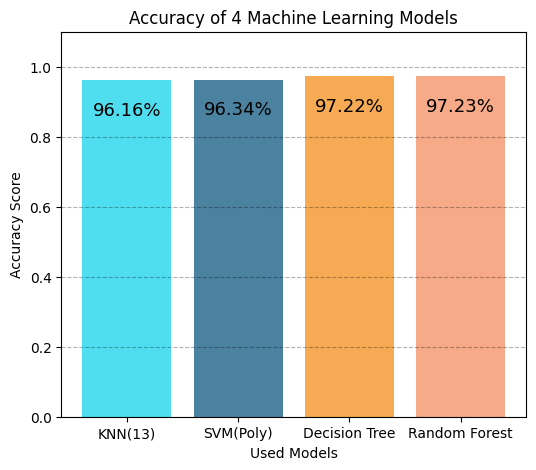

In [152]:
# Showcasing prediction accuracy of the 4 Models using Bar Chart
used_models = ['KNN(13)', 'SVM(Poly)', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_KNN, accuracy_SVM, accuracy_DT, accuracy_RF]
colors = ['#4fdef0', '#4b82a0', '#f6aa54', '#f6aa87']

plt.figure(figsize=(6, 5))
bars = plt.bar(used_models, accuracies, color=colors)

# Adding percentages on top of bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.1, f'{accuracy:.2%}', ha='center', color='black', fontsize=13)

plt.title('Accuracy of 4 Machine Learning Models')
plt.xlabel('Used Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.3, color='black')

plt.show()